## Problems

1. A data mining routine has been applied to a transaction dataset and has classified 88 records as fraudulent (30 correctly so) and 952 as non-fraudulent (920 correctly so). Construct the confusion matrix and calculate the overall error rate.

The following table shows the mentioned data mining routine confusion matrix that was applied to a total of 1040  (952 + 88) records. The two diagonals cells (upper left, lower right) give the number of correct classifications - where the predicted class coincide with the actual class. The off-diagonal cells give counts of misclassification.

|                   | Pred. non-fraud. | Pred. fraud     |
|:------------------|:-----------------|:----------------|
| **non-fraudulent**| 920              | 32              |
| **fraudulent**    | 58               | 30              |

The *estimated misclassification rate*, also called the *overall error rate*. It is given by:

<p><center>$err = \frac{n_{1, 2} + n_{2, 1}}{n} = \frac{32 + 58}{1040} = 8.56 \%$</center></p>


2. Suppose that this routine has an adjustable cutoff (threshold) mechanism by which you can alter the proportion of records classified as fraudulent. Describe how moving the cutoff up or down would affect

a. the classification error rate for records that are truly fraudulent

R> Assuming that the default cutoff for this classifier is 0.5, we have a record classified as fraudulent if the estimated probability is greater than 0.5, otherwise it is classified as a non-fraudulent. If we instead adopt another cutoff, say 0.25, we will classify much more records as fraudulent and the classification rate might go up because will comprise more non-fraudulent misclassified as fraudulent.

Conversely, if we adopt a cutoff of 0.75, we instead classify fewer records as fraudulent and again the misclassification might go up. It is a good practice to empirically identify the best cutoff and validate with an expert to see with the cutoff threshold holds. To see the entire range of cutoff values and how the accuracy or misclassification rates change as a function of the cutoff, we can plot the performance measure of interest vs. the cutoff.

b. the classification

R> By moving up the cutoff value, the fraudulent records will go down and this decreases the number of fraudulent classified records.

Conversely, if the cutoff value is down, the non-fraudulent records will go down and the total fraudulent records will increase.


3. FiscalNote is a startup founded by a Washington, DC entrepreneur and funded by a Singapore sovereign wealth fund, the Winklevoss twins of Facebook fame, and others. It uses machine learning and data mining techniques to predict for its clients whether legislation in the US Congress and in US state legislatures will pass or not. The company reports 94% accuracy. (Washington Post, November 21, 2014, “Capital Business”)

Considering just bills introduced in the US Congress, do a bit of internet research to learn about numbers of bills introduced and passage rates. Identify the possible types of misclassifications, and comment on the use of overall accuracy as a metric. Include a discussion of other possible metrics and the potential role of
propensities.

R> This link gives a very good overview about bills and US Congress: https://www.govtrack.us/congress/bills/statistics

Concerning the misclassification question, we can think about the following.

There are two types of misclassification: 

- Null hypothesis: bill not passed
- Alternate hypothesis: the bill passed

 
    1) Type 1 error (known also as False Positive): It is a condition when the bill is not passed actually but the system predicts that the bill is to be passed

    2) Type 2 error (known also as False Negative): It is a condition when the bill is passed actually but the system predicts that the bill is no passed

Both of the errors (and the correct guesses) can be summarized in a confusion matrix. To asses whether the system is making good predictions we can use the *propensities* - the probability estimation by an algorithm belongs to a given class (or classes). Propensities are typically used either as an interim step for generating predicted class membership (classification), or for rank-ordering the records by their probability of belonging to a class of interest.

If overall classification accuracy (involving all the classes) is of interest, the record can be assigned to the class with the highest probability. Using this technique, it is possible to find the best cutoff that gives the best accuracy for the bill system.

4. Consider the figure below, the decile lift chart for the transaction data model, applied to new data.

a. Interpret the meaning of the first and second bars from the left.

R> Reading the bar on the left, the meaning is that taking 10% of the records that are ranked by the model as “the most probable 1’s” (having the highest propensities) yields six times as many 1’s as would a random selection of 10% of the records. In this example, the decile lift chart indicates that we can also use the model to select the top 20% records with the highest propensities and still perform almost twice as well as random.

b. Explain how you might use this information in practice.

R> It is possible to use the Lift decile chart when the goal is to accurately classify the most interesting or important records, rather than accurately classify the entire sample (e.g., the 10% of customers most likely to respond to an offer, or the 5% of claims most likely to be fraudulent);

c. Another analyst comments that you could improve the accuracy of the model by classifying everything as nonfraudulent. If you do that, what is the error rate?

R> Looking at the lift chart and supposing this is a model for targeting customer, targeting 100% of the population performs no better than random guessing. Therefore, the misclassification error for this model is simply the number of those who responded divided by the number of records. 

d. Comment on the usefulness, in this situation, of these two metrics of model performance (error rate and lift).

R> In this situation we can measure the trade-off between correctly classify the critical records and higher/lower misclassification error, such that we are willing to tolerate greater overall error in return for better identifying the important class for further attention.

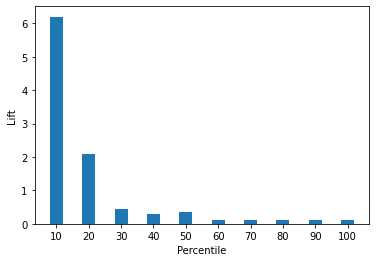

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
from dmutils.utils import classification_summary, lift_chart

import matplotlib.pyplot as plt
import pandas as pd

lift_df = pd.DataFrame({"Lift": [6.2, 2.1, 0.43, 0.3, 0.36, 0.1, 0.1, 0.1, 0.1, 0.1],
                        "Percentile": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

fig, ax = plt.subplots()
ax.bar(lift_df.Percentile, lift_df.Lift, width=4)
ax.set_xlabel("Percentile")
ax.set_ylabel("Lift")
plt.xticks(lift_df.Percentile)
plt.show()

7. The table below shows a small set of predictive model validation results for a classification model, with both actual values and propensities.

a. Calculate error rates, sensitivity, and specificity using cutoffs of 0.25, 0.5, and 0.75.

Remember that:

- **The sensitivity** (also termed recall) of a classifier is its ability to detect the important class members correctly (positive class(

- **The specificity** of a classifier is its ability to rule out $C_2$ members correctly.

b. Create a decile lift chart.

In [2]:
sample_df = pd.DataFrame({
    "propensity_pos_class": [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55,
                             0.59, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13,
                             0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    "actual_class": [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
})
sample_df.head()

,propensity_pos_class,actual_class
0,0.03,0
1,0.52,0
2,0.38,0
3,0.82,1
4,0.33,0


In [3]:
def classification_performance(actual, pred):
    """
    Calculate error rates, sensitivity, and specificity.

    Arguments:
        actual: a pd.Series containing actual classes
        pred: a pd.Series containing predicted classes
    """
    confusion_matrix_ = confusion_matrix(sample_df.actual_class, predicted)
    tn, fp, fn, tp = confusion_matrix_.ravel()
    # calculating the sensitivity
    sensitivity = tp / (tp + fn)
    # calculating the specificity
    specificity = tn / (tn + fp)
    # calculating the accuracy
    acc = accuracy_score(actual, pred)
    print()
    print("Misclassification Rate: {:.2}".format(1 - acc))
    print("Sensitivty            : {:.2}".format(sensitivity))
    print("Specificity           : {:.2}".format(specificity))

## cutoff 0.25
predicted = [1 if p > 0.25 else 0 for p in sample_df.propensity_pos_class]
classification_summary(sample_df.actual_class, predicted, class_names=["0", "1"])
classification_performance(sample_df.actual_class, predicted)
print()

## cutoff 0.5
predicted = [1 if p > 0.5 else 0 for p in sample_df.propensity_pos_class]
classification_summary(sample_df.actual_class, predicted, class_names=["0", "1"])
classification_performance(sample_df.actual_class, predicted)
print()

## cutoff 0.75
predicted = [1 if p > 0.75 else 0 for p in sample_df.propensity_pos_class]
classification_summary(sample_df.actual_class, predicted, class_names=["0", "1"])
classification_performance(sample_df.actual_class, predicted)

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3

Misclassification Rate: 0.4
Sensitivty            : 1.0
Specificity           : 0.53

Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3

Misclassification Rate: 0.1
Sensitivty            : 1.0
Specificity           : 0.88

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2

Misclassification Rate: 0.05
Sensitivty            : 0.67
Specificity           : 1.0


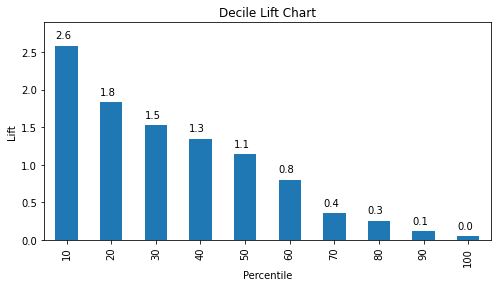

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# sample decile lift chart
lift_chart(sample_df.propensity_pos_class.sort_values(ascending=False), ax=ax)
plt.show()